### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the housing dataset

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

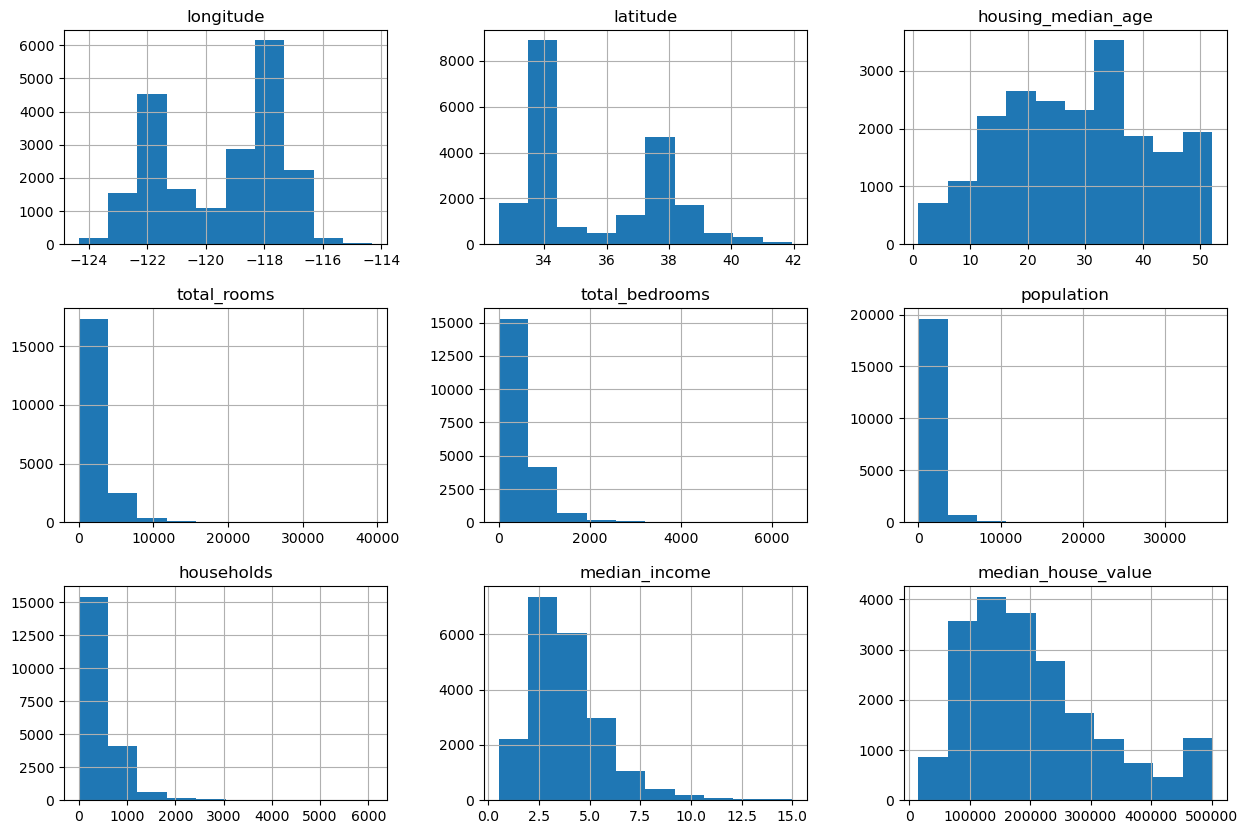

In [3]:
data = pd.read_csv('datasets/housing.csv')
data = data.sample(frac=1, random_state=1)
data = data.dropna()

data.hist(figsize=(15,10))

### Create dummys for non digit variables

In [4]:
data = data.join(pd.get_dummies(data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
y_data = data['median_house_value']
data = data.drop(['median_house_value'], axis=1)
data = data.join(y_data)

### Split data before std

In [5]:
x_data, ocean_prox, y_data = data.iloc[:, :8], data.iloc[:, 8:13], data.iloc[:, -1]

### Data standarization

In [6]:
x_data = (x_data - x_data.mean())/x_data.std()
x_data = x_data.join(ocean_prox)

### Visualise correlation

<Axes: >

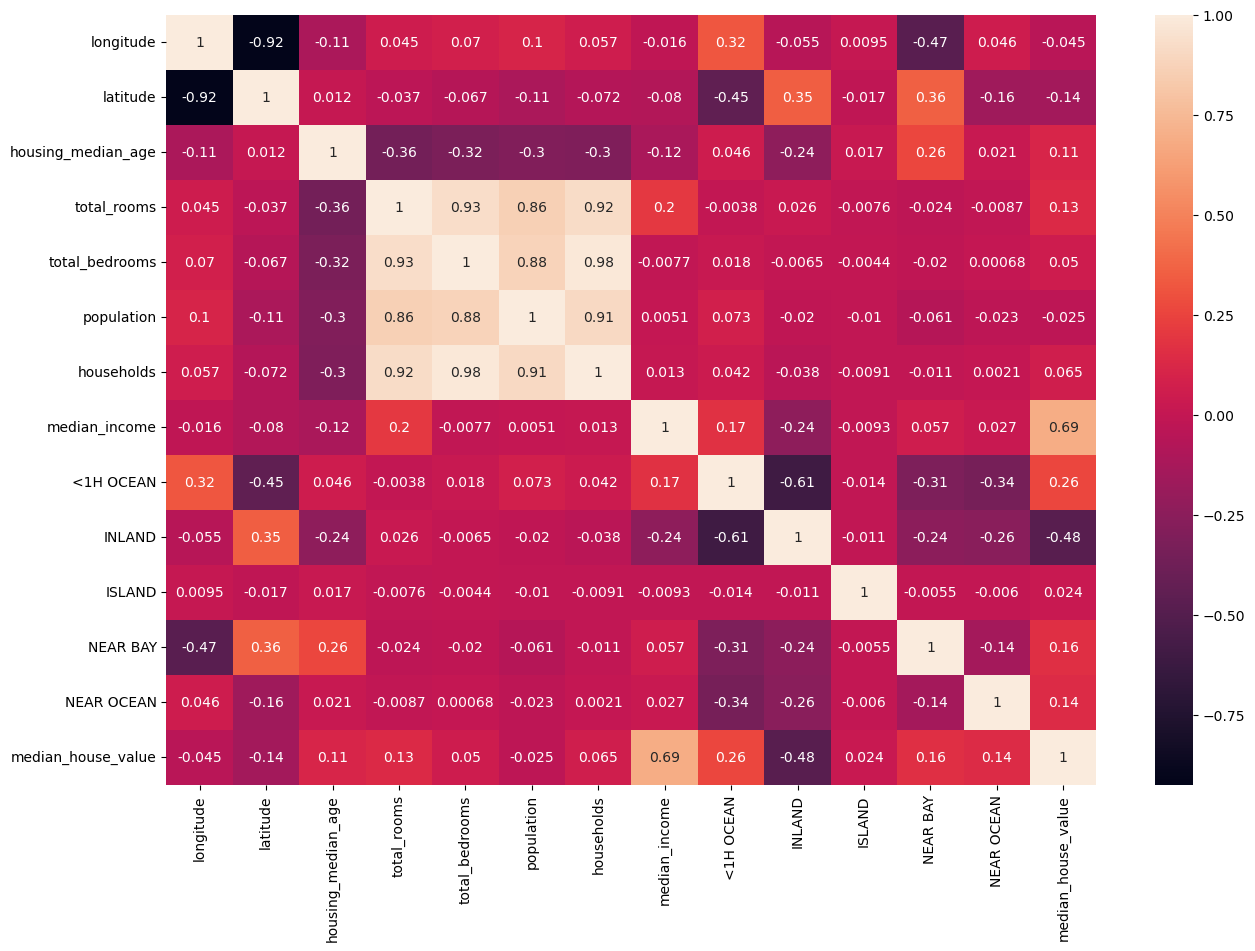

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

### Split dataset

In [8]:
train_size = int(0.7 * len(x_data))
val_size = int(0.2 * len(x_data))
test_size = int(0.1 * len(x_data))

train_range = train_size
val_range = train_size + val_size
test_range = train_size + val_size + test_size

train_size, val_size, test_size

(14303, 4086, 2043)

In [9]:
x_train, y_train = x_data.iloc[0:train_size], y_data.iloc[0:train_size]
x_val, y_val = x_data.iloc[train_size:val_range], y_data.iloc[train_size:val_range]
x_test, y_test = x_data.iloc[val_range:test_range], y_data.iloc[val_range:test_range]

In [10]:
x_train = x_train.to_numpy()

### Training loop

Here's a good explanation of matrix multiplication for multiple linear regression 

https://towardsai.net/p/tutorials/mathematical-intuition-behind-the-gradient-descent-algorithm

In [11]:
from sklearn.metrics import mean_squared_error as mse

b = 0.01
w = np.zeros(len(x_train[0]))

LR = 0.1
EPOCHS = 100000

loss = []
for epoch in range(EPOCHS):
    y_hat = np.dot(x_train, w) + b
    error = y_hat - y_train

    b -= LR * (2/len(x_train) * sum(error))
    w -= LR * (2/len(x_train) * np.dot(error.T, x_train))

    model = np.dot(x_train, w) + b
    loss = 1/len(y_hat) * sum((model - y_train)**2)

print(loss)

4726995357.938478


### Compare score with a LinearRegression model from sklearn

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
predictions = lm.predict(x_train)

loss = mse(y_train, predictions, squared=True)

print(loss)

4726995357.138887


Losses are practically the same. The only difference is the computation time.